In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
#Loading Train Data
train=pd.read_excel("Data_Train.xlsx")
train.head()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,NaN,1.75
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,NaN,12.50
2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,8.61 Lakh,4.50
3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,NaN,6.00
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,NaN,17.74


In [3]:
#Loading Test Data
test=pd.read_excel("Data_Test.xlsx")
test.head()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price
0,Maruti Alto K10 LXI CNG,Delhi,2014,40929,CNG,Manual,First,32.26 km/kg,998 CC,58.2 bhp,4.0,NaN
1,Maruti Alto 800 2016-2019 LXI,Coimbatore,2013,54493,Petrol,Manual,Second,24.7 kmpl,796 CC,47.3 bhp,5.0,NaN
2,Toyota Innova Crysta Touring Sport 2.4 MT,Mumbai,2017,34000,Diesel,Manual,First,13.68 kmpl,2393 CC,147.8 bhp,7.0,25.27 Lakh
3,Toyota Etios Liva GD,Hyderabad,2012,139000,Diesel,Manual,First,23.59 kmpl,1364 CC,null bhp,5.0,NaN
4,Hyundai i20 Magna,Mumbai,2014,29000,Petrol,Manual,First,18.5 kmpl,1197 CC,82.85 bhp,5.0,NaN


In [4]:
train.duplicated().sum(), test.duplicated().sum()

(0, 1)

In [5]:
# checking columns names
print(train.columns)
print(test.columns)

Index(['Name', 'Location', 'Year', 'Kilometers_Driven', 'Fuel_Type',
       'Transmission', 'Owner_Type', 'Mileage', 'Engine', 'Power', 'Seats',
       'New_Price', 'Price'],
      dtype='object')
Index(['Name', 'Location', 'Year', 'Kilometers_Driven', 'Fuel_Type',
       'Transmission', 'Owner_Type', 'Mileage', 'Engine', 'Power', 'Seats',
       'New_Price'],
      dtype='object')


In [6]:
#checking shape
print(train.shape)
print(test.shape)

(6019, 13)
(1234, 12)


In [7]:
# train = train[train.Kilometers_Driven<6000000]

In [8]:
# train = train[train.Kilometers_Driven>=1000]

In [9]:
train.shape , test.shape

((6019, 13), (1234, 12))

In [10]:
#checking missing values
print("train \n",train.isna().sum())
print("\n\ntest \n",test.isna().sum())

train 
 Name                    0
Location                0
Year                    0
Kilometers_Driven       0
Fuel_Type               0
Transmission            0
Owner_Type              0
Mileage                 2
Engine                 36
Power                  36
Seats                  42
New_Price            5195
Price                   0
dtype: int64


test 
 Name                    0
Location                0
Year                    0
Kilometers_Driven       0
Fuel_Type               0
Transmission            0
Owner_Type              0
Mileage                 0
Engine                 10
Power                  10
Seats                  11
New_Price            1052
dtype: int64


In [11]:
combi = train.append(test,ignore_index=True)
combi.shape

C:\Users\Public\Anaconda3\lib\site-packages\pandas\core\frame.py:6692: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  sort=sort)


(7253, 13)

In [12]:
combi.dtypes

Engine                object
Fuel_Type             object
Kilometers_Driven      int64
Location              object
Mileage               object
Name                  object
New_Price             object
Owner_Type            object
Power                 object
Price                float64
Seats                float64
Transmission          object
Year                   int64
dtype: object

In [13]:
combi.Mileage = combi.Mileage.str.split().str[0].astype(np.float64)
combi.Engine = combi.Engine.str.split().str[0].astype(np.float64)
combi.Power = combi.Power.replace('null bhp','0 bhp').str.split().str[0].astype(np.float64)
combi.New_Price = combi.New_Price.replace(np.nan,'0 Lakh').str.split().str[0].astype(np.float64).replace(0.00,np.nan)
combi['Age'] = 2019-combi.Year
combi.head()

,Engine,Fuel_Type,Kilometers_Driven,Location,Mileage,Name,New_Price,Owner_Type,Power,Price,Seats,Transmission,Year,Age
0,998.0,CNG,72000,Mumbai,26.60,Maruti Wagon R LXI CNG,NaN,First,58.16,1.75,5.0,Manual,2010,9
1,1582.0,Diesel,41000,Pune,19.67,Hyundai Creta 1.6 CRDi SX Option,NaN,First,126.20,12.50,5.0,Manual,2015,4
2,1199.0,Petrol,46000,Chennai,18.20,Honda Jazz V,8.61,First,88.70,4.50,5.0,Manual,2011,8
3,1248.0,Diesel,87000,Chennai,20.77,Maruti Ertiga VDI,NaN,First,88.76,6.00,7.0,Manual,2012,7
4,1968.0,Diesel,40670,Coimbatore,15.20,Audi A4 New 2.0 TDI Multitronic,NaN,Second,140.80,17.74,5.0,Automatic,2013,6


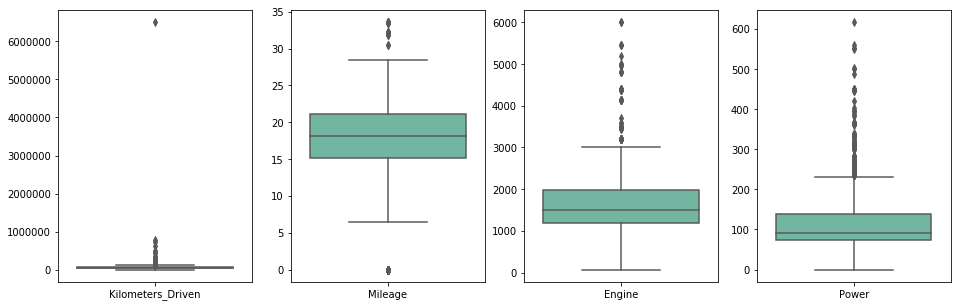

In [14]:
fig, axes = plt.subplots(ncols=4, figsize=(16, 5))
X=combi
sns.boxplot(data=X[['Kilometers_Driven']],  palette='Set2', ax=axes[0]);
sns.boxplot(data=X[['Mileage']]  ,  palette='Set2', ax=axes[1]);
sns.boxplot(data=X[['Engine']], palette='Set2', ax=axes[2]);
sns.boxplot(data=X[['Power']],  palette='Set2', ax=axes[3]);

In [15]:
#checking datatype of all features
print(combi.dtypes)


Engine               float64
Fuel_Type             object
Kilometers_Driven      int64
Location              object
Mileage              float64
Name                  object
New_Price            float64
Owner_Type            object
Power                float64
Price                float64
Seats                float64
Transmission          object
Year                   int64
Age                    int64
dtype: object


In [16]:
combi.Fuel_Type.value_counts()

Diesel      3852
Petrol      3325
CNG           62
LPG           12
Electric       2
Name: Fuel_Type, dtype: int64

In [17]:
combi.Seats.value_counts()

5.0     6047
7.0      796
8.0      170
4.0      119
6.0       38
2.0       18
10.0       8
9.0        3
0.0        1
Name: Seats, dtype: int64

In [18]:
combi.Location.value_counts()

Mumbai        949
Hyderabad     876
Kochi         772
Coimbatore    772
Pune          765
Delhi         660
Kolkata       654
Chennai       591
Jaipur        499
Bangalore     440
Ahmedabad     275
Name: Location, dtype: int64

In [19]:
combi.Owner_Type.value_counts()

First             5952
Second            1152
Third              137
Fourth & Above      12
Name: Owner_Type, dtype: int64

In [20]:
#Splitting name into 2 features, brand and model

#train
names = list(combi.Name)
brand = []
model = []
for i in range(len(names)):
   try:
       brand.append(names[i].split(" ")[0].strip())
       try:
           model.append(" ".join(names[i].split(" ")[1:]).strip())
       except:
           pass
   except:
       print("ERR ! - ", names[i], "@" , i)
combi["Brand"] =  brand
combi["Model"] = model
combi.drop(labels = ['Name'], axis = 1, inplace = True)


# #test
# names = list(test.Name)
# brand = []
# model = []
# for i in range(len(names)):
#    try:
#        brand.append(names[i].split(" ")[0].strip())
#        try:
#            model.append(" ".join(names[i].split(" ")[1:]).strip())
#        except:
#            pass
#    except:
#        print("ERR ! - ", names[i], "@" , i)
# test["Brand"] =  brand
# test["Model"] = model
# test.drop(labels = ['Name'], axis = 1, inplace = True)

In [21]:
print(combi.Brand.unique())
print(combi.Model.unique())

['Maruti' 'Hyundai' 'Honda' 'Audi' 'Nissan' 'Toyota' 'Volkswagen' 'Tata'
 'Land' 'Mitsubishi' 'Renault' 'Mercedes-Benz' 'BMW' 'Mahindra' 'Ford'
 'Porsche' 'Datsun' 'Jaguar' 'Volvo' 'Chevrolet' 'Skoda' 'Mini' 'Fiat'
 'Jeep' 'Smart' 'Ambassador' 'Isuzu' 'ISUZU' 'Force' 'Bentley'
 'Lamborghini' 'Hindustan' 'OpelCorsa']
['Wagon R LXI CNG' 'Creta 1.6 CRDi SX Option' 'Jazz V' ...
 'EcoSport 1.5 Petrol Ambiente' 'Compass 1.4 Sport' 'Elite i20 Magna Plus']


In [22]:
#combi['Brand']=df['Name'].apply(lambda x: " ".join(x.split(" ")[:2])).astype('category')
combi['Engine']=combi.groupby(['Brand']).transform(lambda x: x.fillna(x.mean()))['Engine']
combi['Power']=combi.groupby(['Brand']).transform(lambda x: x.fillna(x.mean()))['Power']
combi['Seats']=combi.groupby(['Brand']).transform(lambda x: x.fillna(x.mean()))['Seats']
combi['Mileage']=combi.groupby(['Brand']).transform(lambda x: x.fillna(x.mean()))['Mileage']
combi['New_Price']=combi.groupby(['Brand']).transform(lambda x: x.fillna(x.mean()))['New_Price']
combi.New_Price.fillna(value=0,inplace=True)
combi.Power.fillna(value=combi.Power.mean(),inplace=True)
#combi.Seats.fillna(value=5.0,inplace=True)

In [23]:
#Initializing label encoders
from sklearn.preprocessing import LabelEncoder
le_brands = LabelEncoder()
le_models = LabelEncoder()
le_locations = LabelEncoder()
le_fuel_types = LabelEncoder()
le_transmissions = LabelEncoder()
le_owner_types = LabelEncoder()
#le_year=LabelEncoder()
#le_seats=LabelEncoder()

#Fitting the categories
combi.Brand = le_brands.fit_transform(combi.Brand)
combi.Model = le_models.fit_transform(combi.Model)
combi.Location = le_locations.fit_transform(combi.Location)
combi.Fuel_Type = le_fuel_types.fit_transform(combi.Fuel_Type)
combi.Transmission = le_transmissions.fit_transform(combi.Transmission)
combi.Owner_Type = le_owner_types.fit_transform(combi.Owner_Type)

In [24]:
combi['Kilometers_Driven_log']=np.log(combi.Kilometers_Driven)

In [25]:
# from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
# v_name = TfidfVectorizer(ngram_range=(1,3),stop_words="english", analyzer='word')
# name_tr =v_name.fit_transform(train['Name'])
# name_ts =v_name.transform(test['Name'])


# from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
# v_namec = TfidfVectorizer(ngram_range=(1,7),stop_words="english", analyzer='char')
# name_trc =v_namec.fit_transform(train['Name'])
# name_tsc =v_namec.transform(test['Name'])

In [26]:
combi.head()

,Engine,Fuel_Type,Kilometers_Driven,Location,Mileage,New_Price,Owner_Type,Power,Price,Seats,Transmission,Year,Age,Brand,Model,Kilometers_Driven_log
0,998.0,0,72000,9,26.60,7.845907,0,58.16,1.75,5.0,1,2010,9,19,1797,11.184421
1,1582.0,1,41000,10,19.67,11.836154,0,126.20,12.50,5.0,1,2015,4,11,498,10.621327
2,1199.0,4,46000,2,18.20,8.610000,0,88.70,4.50,5.0,1,2011,8,10,993,10.736397
3,1248.0,1,87000,2,20.77,7.845907,0,88.76,6.00,7.0,1,2012,7,19,676,11.373663
4,1968.0,1,40670,3,15.20,49.301724,2,140.80,17.74,5.0,0,2013,6,1,105,10.613246


In [27]:
train_X = combi.iloc[:train.shape[0],:].drop(['Price','Kilometers_Driven','Year','Model'],axis=1)
train_Y = combi.iloc[:train.shape[0],8]
test_set = combi.iloc[train.shape[0]:,:].drop(['Price','Kilometers_Driven','Year','Model'],axis=1)
print(train_X.shape)
print(train_Y.shape)
print(test_set.shape)
final_featurest=train_Y
final_features=train_X
# from scipy.sparse import csr_matrix
# from scipy import sparse
# final_features = sparse.hstack((train_X,name_tr,name_trc )).tocsr()
# final_featurest = sparse.hstack((test_set,name_ts,name_tsc )).tocsr()

(6019, 12)
(6019,)
(1234, 12)


In [28]:
combi.corr()['Price']

Engine                   0.658834
Fuel_Type               -0.305207
Kilometers_Driven       -0.011493
Location                -0.116620
Mileage                 -0.306634
New_Price                0.663108
Owner_Type              -0.094559
Power                    0.758952
Price                    1.000000
Seats                    0.052662
Transmission            -0.586025
Year                     0.305327
Age                     -0.305327
Brand                   -0.137949
Model                   -0.086954
Kilometers_Driven_log   -0.185937
Name: Price, dtype: float64

In [29]:
combi.isna().sum()

Engine                      0
Fuel_Type                   0
Kilometers_Driven           0
Location                    0
Mileage                     0
New_Price                   0
Owner_Type                  0
Power                       0
Price                    1234
Seats                       0
Transmission                0
Year                        0
Age                         0
Brand                       0
Model                       0
Kilometers_Driven_log       0
dtype: int64

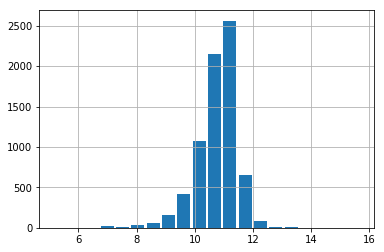

In [30]:
combi.Kilometers_Driven_log.hist(bins=20,rwidth=0.85)
# n, bins, patches = plt.hist(combi.Engine_bins,20,rwidth=0.85)
# plt.xticks(fontsize=15)
# plt.show()


In [31]:
#Splitting the training set into Training and validation sets

from sklearn.model_selection import train_test_split
X_train, X_val, Y_train, Y_val = train_test_split(final_features, train_Y, test_size = 0.2, random_state =1)

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.tree import DecisionTreeRegressor
from xgboost import XGBRegressor
import lightgbm as lgb
import sklearn.metrics

# Score Calculation
def score(y_pred, y_true):
    error = np.square(np.log10(y_pred +1) - np.log10(y_true +1)).mean() ** 0.5
    score = 1 - error
    return score

In [32]:
#Initializing Linear regressor
lr = LinearRegression()
#Fitting the regressor with training data
lr.fit(X_train,Y_train)
print(lr.score(X_train,Y_train)) #training set
# for i in range(len(Y_val)):
#     if Y_val[i] < 0:
#         Y_val[i] = 0
print(lr.score(X_val,Y_val)) #testing set
#cross validation
#Predicting the target(Price) for predictors in validation set X_val
#Y_pred = sc.inverse_transform(lr.predict(X_val))
Y_pred = (lr.predict(X_val))
#Eliminating negative values in prediction for score calculation
for i in range(len(Y_pred)):
    if Y_pred[i] < 0:
        Y_pred[i] = 0
scores = cross_val_score(lr,X_val,Y_val, cv = 5)
print()

print("Scores:")
print(scores)

print("mse",sklearn.metrics.mean_squared_error(Y_val, Y_pred))

#Printing the score for validation sets
print(" Linear Regression SCORE : ", score(Y_pred, Y_val))     # mean 0.2345-skew-350 ,  without km_log robust
#           mse 37.166472907918475
#  Linear Regression SCORE :  0.7596685866716576            0.8474  0.854   

0.6998954420608696
0.7424370303411191

Scores:
[0.75335175 0.73433417 0.71582735 0.75316212 0.73957703]
mse 32.1898457016692
 Linear Regression SCORE :  0.7864834013110633


In [33]:
from sklearn.linear_model import ElasticNet
rr =ElasticNet(alpha=0.5)
rr.fit(X_train,Y_train)

Y_pred_rr = (rr.predict(X_val))
#Eliminating negative values in prediction for score calculation
for i in range(len(Y_pred_rr)):
    if Y_pred_rr[i] < 0:
        Y_pred_rr[i] = 0

print(" SCORE : ", score(Y_pred_rr, Y_val)) 

 SCORE :  0.7930624396564749


In [34]:
clf = RandomForestRegressor(n_estimators=500, max_features="sqrt");
# The gradient boosting classifier didnt finish running
# clf = GradientBoostingClassifier(n_estimators=5)
clf = clf.fit(X_train, Y_train);
print("Done training best classifier.")

print('Calculating error...')
y_pred = clf.predict(X_val)
for i in range(len(y_pred)):
    if y_pred[i] < 0:
        y_pred[i] = 0

scores = cross_val_score(clf,X_val,Y_val, cv = 5)
print()

print("Scores:")
print(scores) 
print("\n",score(y_pred, Y_val))     #0.9336-km

print("\n",clf.feature_importances_)

sklearn.metrics.mean_squared_error(Y_val, y_pred)

Done training best classifier.
Calculating error...

Scores:
[0.91197151 0.91378862 0.88780455 0.87884541 0.85662247]

 0.9299526375443771

 [0.14316181 0.01590933 0.01915557 0.04275942 0.18276869 0.00591479
 0.27721821 0.0244495  0.06603982 0.11124567 0.04425624 0.06712095]


8.111360224400116

In [35]:
gb= GradientBoostingRegressor(loss='ls', 
                               learning_rate=0.3, 
                               n_estimators=380, 
                               subsample=1.0, 
                               criterion='friedman_mse', 
                               min_samples_split=30, 
                               min_samples_leaf=1, 
                               min_weight_fraction_leaf=0.0, 
                               max_depth=7, 
                               min_impurity_decrease=0.0, 
                               min_impurity_split=None, 
                               init=None, 
                               random_state=0, 
                               max_features=None, 
                               alpha=0.9, 
                               verbose=100, 
                               max_leaf_nodes=None, 
                               warm_start=False, 
                               presort='auto')
gb.fit(X_train, Y_train);
print("Done training best classifier.")

print('Calculating error...')
y_pred = gb.predict(X_val)
for i in range(len(y_pred)):
    if y_pred[i] < 0:
        y_pred[i] = 0

scores = cross_val_score(gb,X_val,Y_val, cv = 5)    #0.9337-km,  0.9344 -km-year  0.9364
#test = test1
print()

print("Scores:")
print(scores) 
print("\n",score(y_pred, Y_val))

#print("\n",gb.feature_importances_)

print(gb.score(X_train,Y_train)) #training set
print(gb.score(X_val,Y_val)) #testing set
sklearn.metrics.mean_squared_error(Y_val, y_pred)

#public leaderboard -0.9344

      Iter       Train Loss   Remaining Time 
         1          66.8623            8.34s
         2          38.4951            8.88s
         3          23.9415            8.80s
         4          16.0340            8.65s
         5          11.2772            8.63s
         6           8.8243            8.42s
         7           7.2216            8.37s
         8           6.1757            8.23s
         9           5.4331            8.41s
        10           4.8410            8.25s
        11           4.3893            8.15s
        12           4.1779            7.97s
        13           3.9429            7.76s
        14           3.7733            7.48s
        15           3.6665            7.28s
        16           3.3193            7.26s
        17           3.1465            7.11s
        18           2.9036            6.94s
        19           2.5346            6.80s
        20           2.3898            6.75s
        21           2.2640            6.65s
        2

       192           0.1572            3.03s
       193           0.1546            3.02s
       194           0.1537            3.00s
       195           0.1521            2.98s
       196           0.1516            2.96s
       197           0.1483            2.95s
       198           0.1461            2.94s
       199           0.1452            2.92s
       200           0.1435            2.90s
       201           0.1419            2.89s
       202           0.1405            2.87s
       203           0.1389            2.86s
       204           0.1385            2.84s
       205           0.1371            2.82s
       206           0.1370            2.80s
       207           0.1353            2.79s
       208           0.1328            2.77s
       209           0.1317            2.76s
       210           0.1311            2.74s
       211           0.1289            2.72s
       212           0.1282            2.71s
       213           0.1277            2.69s
       214

       375           0.0465            0.08s
       376           0.0461            0.06s
       377           0.0459            0.05s
       378           0.0458            0.03s
       379           0.0457            0.02s
       380           0.0455            0.00s
Done training best classifier.
Calculating error...
      Iter       Train Loss   Remaining Time 
         1          70.3786            1.52s
         2          41.3566            1.51s
         3          26.3585            1.63s
         4          16.0949            1.50s
         5          10.1733            1.50s
         6           7.0090            1.50s
         7           5.3832            1.49s
         8           4.1814            1.44s
         9           3.4456            1.40s
        10           2.9944            1.37s
        11           2.5912            1.38s
        12           2.3095            1.32s
        13           2.0468            1.33s
        14           1.8410            1.31s
  

       184           0.0137            0.67s
       185           0.0132            0.67s
       186           0.0130            0.66s
       187           0.0128            0.66s
       188           0.0127            0.66s
       189           0.0126            0.65s
       190           0.0124            0.65s
       191           0.0122            0.64s
       192           0.0119            0.64s
       193           0.0119            0.64s
       194           0.0117            0.63s
       195           0.0114            0.63s
       196           0.0112            0.63s
       197           0.0111            0.62s
       198           0.0108            0.62s
       199           0.0104            0.62s
       200           0.0102            0.61s
       201           0.0098            0.61s
       202           0.0096            0.61s
       203           0.0094            0.60s
       204           0.0092            0.60s
       205           0.0092            0.60s
       206

      Iter       Train Loss   Remaining Time 
         1          77.8664            1.52s
         2          43.4424            1.70s
         3          26.2658            1.64s
         4          16.2791            1.60s
         5          11.1317            1.57s
         6           7.8213            1.50s
         7           5.7248            1.44s
         8           4.3465            1.39s
         9           3.5040            1.36s
        10           3.0785            1.37s
        11           2.7155            1.34s
        12           2.3596            1.32s
        13           2.1059            1.30s
        14           1.8992            1.28s
        15           1.7036            1.29s
        16           1.6123            1.27s
        17           1.4645            1.26s
        18           1.2966            1.27s
        19           1.2159            1.25s
        20           1.1588            1.24s
        21           1.1156            1.23s
        2

       237           0.0070            0.45s
       238           0.0069            0.45s
       239           0.0068            0.45s
       240           0.0067            0.45s
       241           0.0066            0.44s
       242           0.0065            0.44s
       243           0.0064            0.44s
       244           0.0062            0.43s
       245           0.0061            0.43s
       246           0.0060            0.43s
       247           0.0059            0.43s
       248           0.0058            0.42s
       249           0.0057            0.42s
       250           0.0057            0.42s
       251           0.0054            0.41s
       252           0.0051            0.41s
       253           0.0050            0.41s
       254           0.0050            0.40s
       255           0.0050            0.40s
       256           0.0049            0.40s
       257           0.0048            0.39s
       258           0.0047            0.39s
       259

        74           0.1681            1.05s
        75           0.1619            1.05s
        76           0.1592            1.04s
        77           0.1495            1.04s
        78           0.1435            1.04s
        79           0.1354            1.04s
        80           0.1331            1.03s
        81           0.1218            1.03s
        82           0.1128            1.03s
        83           0.1077            1.03s
        84           0.1056            1.02s
        85           0.1032            1.02s
        86           0.1013            1.01s
        87           0.1010            1.00s
        88           0.0987            1.00s
        89           0.0972            0.99s
        90           0.0958            0.99s
        91           0.0917            0.98s
        92           0.0897            0.98s
        93           0.0876            0.98s
        94           0.0854            0.97s
        95           0.0839            0.97s
        96

       292           0.0021            0.30s
       293           0.0021            0.30s
       294           0.0021            0.30s
       295           0.0020            0.29s
       296           0.0020            0.29s
       297           0.0019            0.29s
       298           0.0019            0.28s
       299           0.0019            0.28s
       300           0.0019            0.27s
       301           0.0019            0.27s
       302           0.0019            0.27s
       303           0.0018            0.26s
       304           0.0018            0.26s
       305           0.0018            0.26s
       306           0.0017            0.25s
       307           0.0017            0.25s
       308           0.0017            0.25s
       309           0.0017            0.24s
       310           0.0017            0.24s
       311           0.0017            0.24s
       312           0.0016            0.23s
       313           0.0016            0.23s
       314

       142           0.0398            0.75s
       143           0.0397            0.75s
       144           0.0394            0.75s
       145           0.0382            0.75s
       146           0.0374            0.74s
       147           0.0365            0.74s
       148           0.0363            0.74s
       149           0.0361            0.73s
       150           0.0360            0.73s
       151           0.0352            0.72s
       152           0.0344            0.72s
       153           0.0342            0.72s
       154           0.0337            0.71s
       155           0.0328            0.71s
       156           0.0317            0.71s
       157           0.0304            0.70s
       158           0.0289            0.70s
       159           0.0281            0.70s
       160           0.0268            0.69s
       161           0.0260            0.69s
       162           0.0254            0.69s
       163           0.0252            0.68s
       164

       325           0.0013            0.17s
       326           0.0013            0.17s
       327           0.0013            0.17s
       328           0.0013            0.16s
       329           0.0012            0.16s
       330           0.0012            0.16s
       331           0.0012            0.15s
       332           0.0012            0.15s
       333           0.0012            0.15s
       334           0.0012            0.14s
       335           0.0012            0.14s
       336           0.0011            0.14s
       337           0.0011            0.13s
       338           0.0011            0.13s
       339           0.0011            0.13s
       340           0.0011            0.12s
       341           0.0011            0.12s
       342           0.0011            0.12s
       343           0.0010            0.12s
       344           0.0010            0.11s
       345           0.0010            0.11s
       346           0.0010            0.11s
       347

       177           0.0221            0.64s
       178           0.0219            0.64s
       179           0.0212            0.63s
       180           0.0208            0.63s
       181           0.0205            0.63s
       182           0.0202            0.62s
       183           0.0199            0.62s
       184           0.0199            0.62s
       185           0.0197            0.61s
       186           0.0193            0.61s
       187           0.0189            0.61s
       188           0.0186            0.60s
       189           0.0184            0.60s
       190           0.0179            0.60s
       191           0.0172            0.59s
       192           0.0172            0.59s
       193           0.0171            0.59s
       194           0.0169            0.58s
       195           0.0166            0.58s
       196           0.0166            0.58s
       197           0.0162            0.57s
       198           0.0159            0.57s
       199

       360           0.0016            0.06s
       361           0.0016            0.06s
       362           0.0015            0.06s
       363           0.0015            0.05s
       364           0.0015            0.05s
       365           0.0015            0.05s
       366           0.0015            0.04s
       367           0.0015            0.04s
       368           0.0015            0.04s
       369           0.0015            0.03s
       370           0.0014            0.03s
       371           0.0014            0.03s
       372           0.0014            0.03s
       373           0.0014            0.02s
       374           0.0014            0.02s
       375           0.0014            0.02s
       376           0.0014            0.01s
       377           0.0013            0.01s
       378           0.0013            0.01s
       379           0.0013            0.00s
       380           0.0013            0.00s

Scores:
[0.94123996 0.9342925  0.92478217 0.86870323 0

8.51627055034908

In [38]:

d = DecisionTreeRegressor(random_state=350)
d.fit(X_train, Y_train);
print("Done training best classifier.")

print('Calculating error...')
y_pred = d.predict(X_val)
for i in range(len(y_pred)):
    if y_pred[i] < 0:
        y_pred[i] = 0

scores = cross_val_score(d,X_val,Y_val, cv = 5)
print()

print("Scores:")
print(scores) 
print("\n",score(y_pred, Y_val))    #0.9027772098434983


#print("\n",d.feature_importances_)

sklearn.metrics.mean_squared_error(Y_val, y_pred)

Done training best classifier.
Calculating error...

Scores:
[0.88095204 0.89983016 0.80969408 0.69251963 0.67264599]

 0.8970312943740644


19.453500477574753

In [39]:
xgb = XGBRegressor(max_depth=9, 
                   learning_rate=0.5, 
                   n_estimators=112, 
                   silent=False, 
                   objective='reg:linear', 
                   booster='gbtree', 
                   n_jobs=1, 
                   nthread=None, 
                   gamma=0, 
                   min_child_weight=1, 
                   max_delta_step=0, 
                   subsample=1, 
                   colsample_bytree=1, 
                   colsample_bylevel=1, 
                   reg_alpha=0.89, 
                   reg_lambda=1, 
                   scale_pos_weight=1, 
                   base_score=0.5, 
                   random_state=0, 
                   seed=None)
xgb.fit(X_train,Y_train)
y_pred1 = xgb.predict(X_val)
for i in range(len(y_pred1)):
    if y_pred1[i] < 0:
        y_pred1[i] = 0

scores = cross_val_score(xgb,X_val,Y_val, cv = 5)
print()

print("Scores:")
print(scores) 
print("\n",score(y_pred1, Y_val))    #0.93-Year


#print("\n",d.feature_importances_)

sklearn.metrics.mean_squared_error(Y_val, y_pred1)

C:\Users\Public\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[23:45:56] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[23:45:59] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\Public\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[23:45:59] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\Public\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[23:45:59] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\Public\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[23:46:00] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\Public\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[23:46:00] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.

Scores:
[0.86500948 0.90720594 0.87303542 0.78281487 0.85570277]

 0.9297669371250015


11.39272143517847

In [40]:
import lightgbm as lgb

l=lgb.LGBMRegressor(objective='regression',
         boosting='gbdt',
         num_iterations= 3000,   
         learning_rate=0.06,  
         num_leaves= 40,  
         max_depth= 24,   
         min_data_in_leaf=11,  
         max_bin= 4, 
         metric='l2_root')
l.fit(X_train,Y_train)
scores = cross_val_score(l,X_val,Y_val, cv = 5)
print()

y_pred2 = l.predict(X_val)
for i in range(len(y_pred2)):
    if y_pred2[i] < 0:
        y_pred2[i] = 0
print("Scores:")
print(scores) 
print(score(y_pred2, Y_val))
sklearn.metrics.mean_squared_error(Y_val, y_pred2)


C:\Users\Public\Anaconda3\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))
C:\Users\Public\Anaconda3\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))
C:\Users\Public\Anaconda3\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))
C:\Users\Public\Anaconda3\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))
C:\Users\Public\Anaconda3\lib\site-packages\lightgbm\engine.py:1


Scores:
[0.71000377 0.81689442 0.5658678  0.57743314 0.549697  ]
0.8629904872241028


34.97773064044233

In [41]:
from sklearn.ensemble import BaggingRegressor
br = BaggingRegressor(base_estimator=None, 
                      n_estimators=50, 
                      max_samples=1.0, 
                      max_features=1.0, 
                      bootstrap=True, 
                      bootstrap_features=False, 
                      oob_score=False, 
                      warm_start=False, 
                      n_jobs=1, 
                      random_state=1, 
                      verbose=0)
br.fit(X_train,Y_train)
scores = cross_val_score(br,X_val,Y_val, cv = 5)
print()

y_pred3 = br.predict(X_val)
for i in range(len(y_pred3)):
    if y_pred3[i] < 0:
        y_pred3[i] = 0
print("Scores:")
print(scores) 
print(score(y_pred3, Y_val))
sklearn.metrics.mean_squared_error(Y_val, y_pred3) #0.932

#public leaderboard-0.9271


Scores:
[0.93501424 0.90918453 0.91365506 0.86087693 0.8398588 ]
0.9299028022190065


8.88395962728664

In [47]:
#Initializing a new regressor
# br = BaggingRegressor(base_estimator=None, 
#                       n_estimators=50, 
#                       max_samples=1.0, 
#                       max_features=1.0, 
#                       bootstrap=True, 
#                       bootstrap_features=False, 
#                       oob_score=False, 
#                       warm_start=False, 
#                       n_jobs=1, 
#                       random_state=1, 
#                       verbose=0)

##Final Model

gb= GradientBoostingRegressor(loss='ls', 
                               learning_rate=0.3, 
                               n_estimators=380, 
                               subsample=1.0, 
                               criterion='friedman_mse', 
                               min_samples_split=30, 
                               min_samples_leaf=1, 
                               min_weight_fraction_leaf=0.0, 
                               max_depth=7, 
                               min_impurity_decrease=0.0, 
                               min_impurity_split=None, 
                               init=None, 
                               random_state=0, 
                               max_features=None, 
                               alpha=0.9, 
                               verbose=100, 
                               max_leaf_nodes=None, 
                               warm_start=False, 
                               presort='auto')
gb.fit(final_features,train_Y)
#Fitting the regressor with complete training data(X_train_data,Y_train_data)
#lr2.fit(X_train1,Y_train1)

#Predicting the target(Price) for predictors in the test data
Y_pred2 =gb.predict(test_set)

#Eliminating negative values in prediction for score calculation
for i in range(len(Y_pred2)):
    if Y_pred2[i] < 0:
        Y_pred2[i] = 0

#Saving the predictions to an excel sheet
#
pd.DataFrame(Y_pred2, columns = ['Price']).to_excel("predictions_grad1.xlsx",index=False)

      Iter       Train Loss   Remaining Time 
         1          67.7707           11.37s
         2          37.9625           11.72s
         3          22.8277           13.07s
         4          14.6932           12.88s
         5          10.3542           12.53s
         6           7.9640           12.22s
         7           6.3506           12.04s
         8           5.2851           11.90s
         9           4.6580           11.67s
        10           4.2364           11.36s
        11           3.6076           11.00s
        12           3.2199           10.76s
        13           2.9544           10.42s
        14           2.7769           10.22s
        15           2.6029           10.17s
        16           2.4551           10.10s
        17           2.3777            9.97s
        18           2.2633            9.84s
        19           2.1062            9.79s
        20           2.0357            9.63s
        21           1.9954            9.44s
        2

       183           0.2376            4.19s
       184           0.2361            4.17s
       185           0.2360            4.14s
       186           0.2354            4.12s
       187           0.2343            4.09s
       188           0.2333            4.07s
       189           0.2318            4.05s
       190           0.2313            4.02s
       191           0.2309            3.99s
       192           0.2306            3.97s
       193           0.2282            3.94s
       194           0.2281            3.91s
       195           0.2264            3.89s
       196           0.2263            3.87s
       197           0.2217            3.85s
       198           0.2215            3.82s
       199           0.2209            3.80s
       200           0.2208            3.77s
       201           0.2201            3.75s
       202           0.2191            3.73s
       203           0.2168            3.71s
       204           0.2135            3.69s
       205

       368           0.0841            0.25s
       369           0.0840            0.23s
       370           0.0839            0.20s
       371           0.0838            0.18s
       372           0.0838            0.16s
       373           0.0832            0.14s
       374           0.0828            0.12s
       375           0.0824            0.10s
       376           0.0822            0.08s
       377           0.0820            0.06s
       378           0.0817            0.04s
       379           0.0816            0.02s
       380           0.0815            0.00s


Public Leaderboard Score-0.9344